In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
data = pd.read_excel(r"C:\Users\User\OneDrive\Downloads\Flight_price_dataset\Data_Train.xlsx")
data.dropna(inplace = True)     # Drop null rows

data['Airline'] = data['Airline'].replace('Multiple carriers Premium economy', 'MCPE')

In [260]:
def convert_duration(duration):
    duration = duration.strip()
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())
    return hours * 60 + minutes

data['Duration'] = data['Duration'].apply(convert_duration)     # Convert Duration to numeric values (minutes)

In [261]:
# Convert departure time and arrival time to proper datetime and extract hour-min
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute

C:\Users\User\AppData\Local\Temp\ipykernel_9896\3382507942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
C:\Users\User\AppData\Local\Temp\ipykernel_9896\3382507942.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])


In [262]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month

data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Additional_Info'], axis=1, inplace=True)     # Drop unnecessary columns

C:\Users\User\AppData\Local\Temp\ipykernel_9896\185042646.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [263]:
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
data['Total_Stops'] = data['Total_Stops'].map(stop_mapping).fillna(-1).astype(int)      # Convert total_stops to numerical

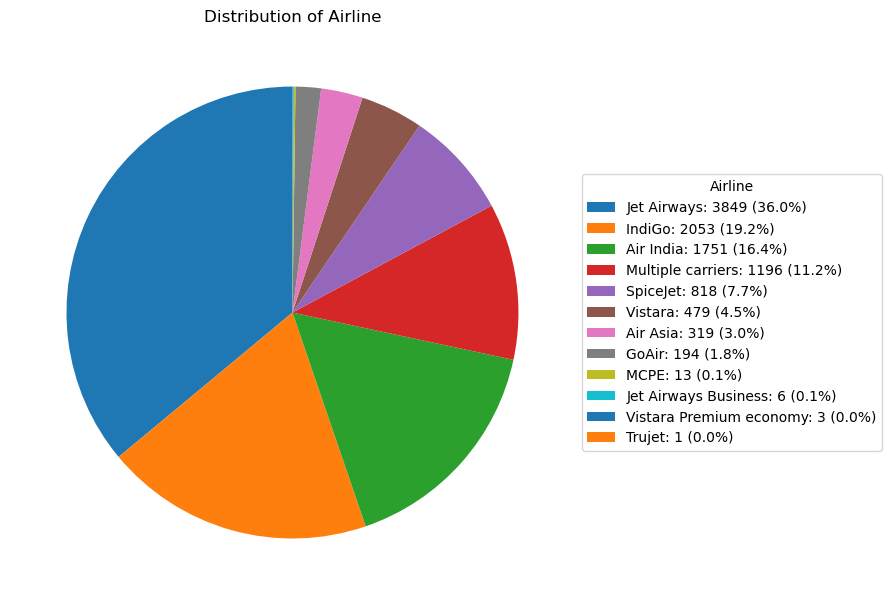

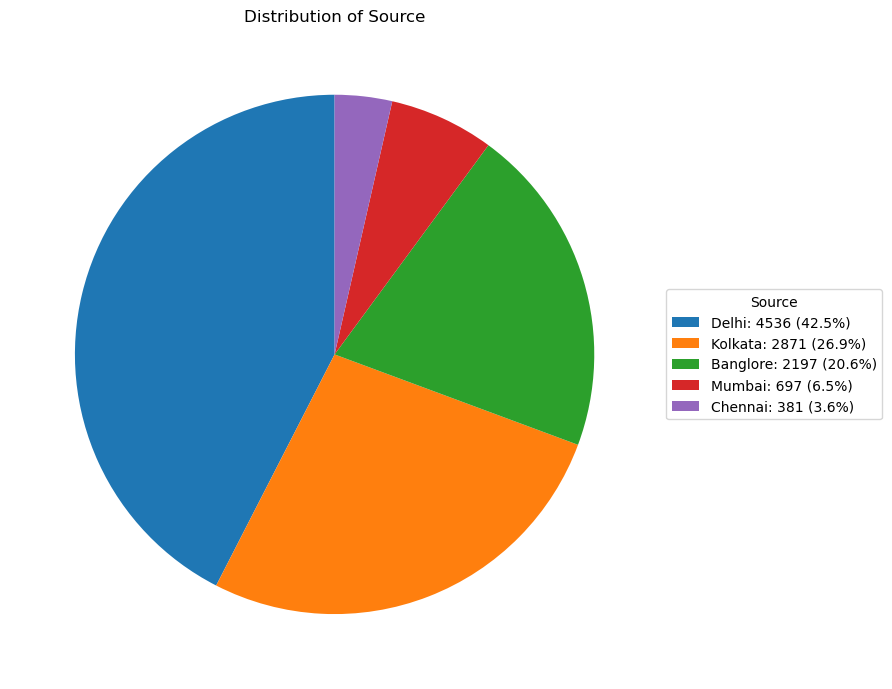

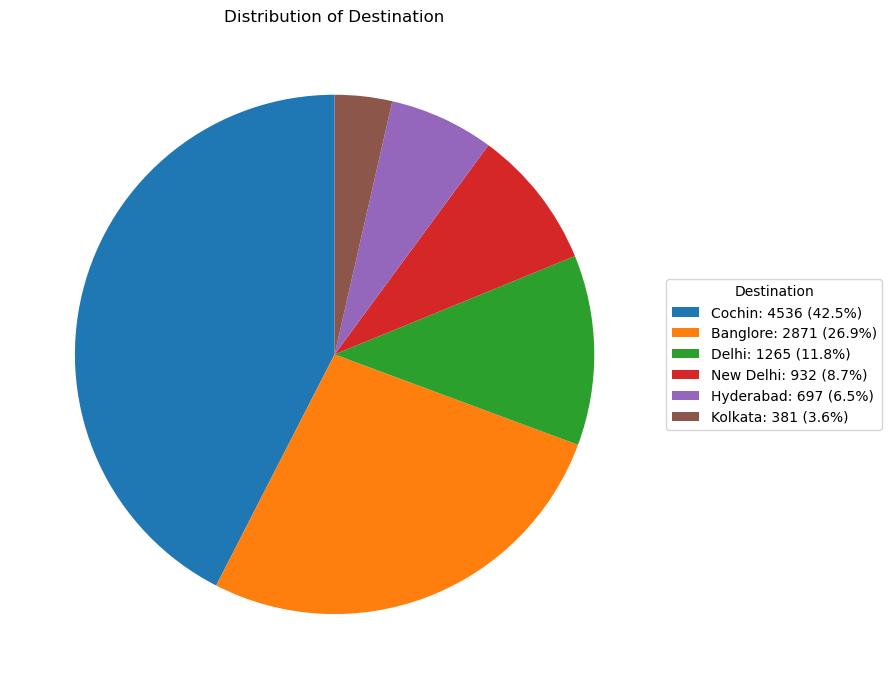

In [264]:
# Pie chart visualization
for i in ['Airline', 'Source', 'Destination']:
    plt.figure(figsize=(9, 9))
    counts = data[i].value_counts()     # Series of count value of each unique category
    wedges, _ = plt.pie(counts, labels=None, startangle=90)     # Creates pie chart and picks only list of slice objects, used for creating legend
    total = counts.sum()
    legend_labels = [f"{category}: {count} ({count/total*100:.1f}%)" 
                     for category, count in counts.items()]     
    plt.legend(wedges, legend_labels, title=i, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()
    print("\n\n")


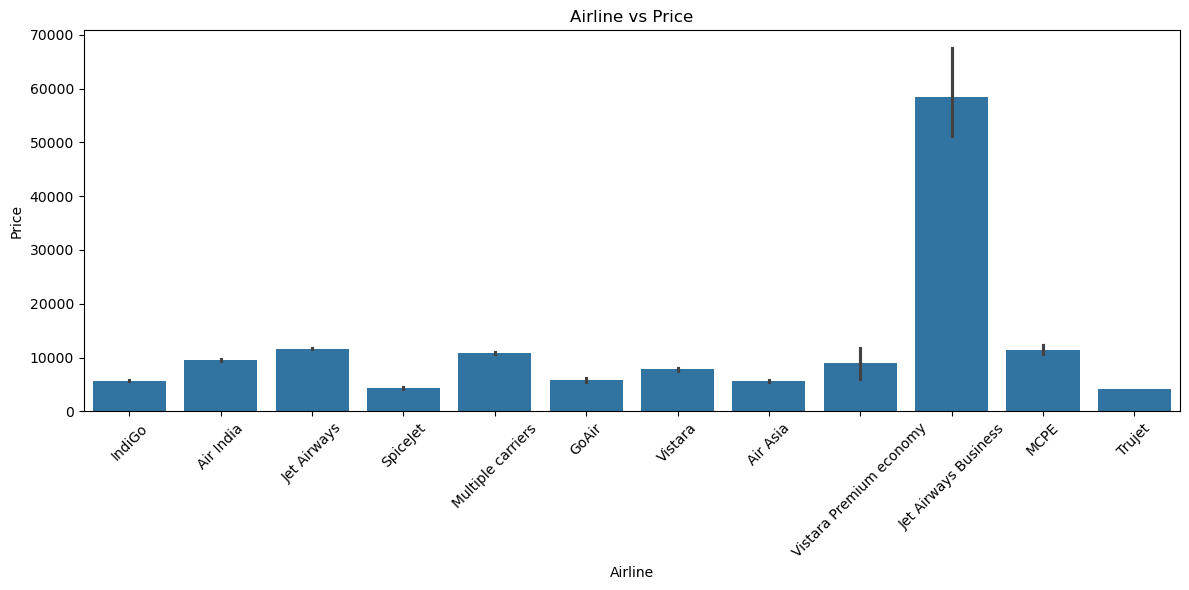

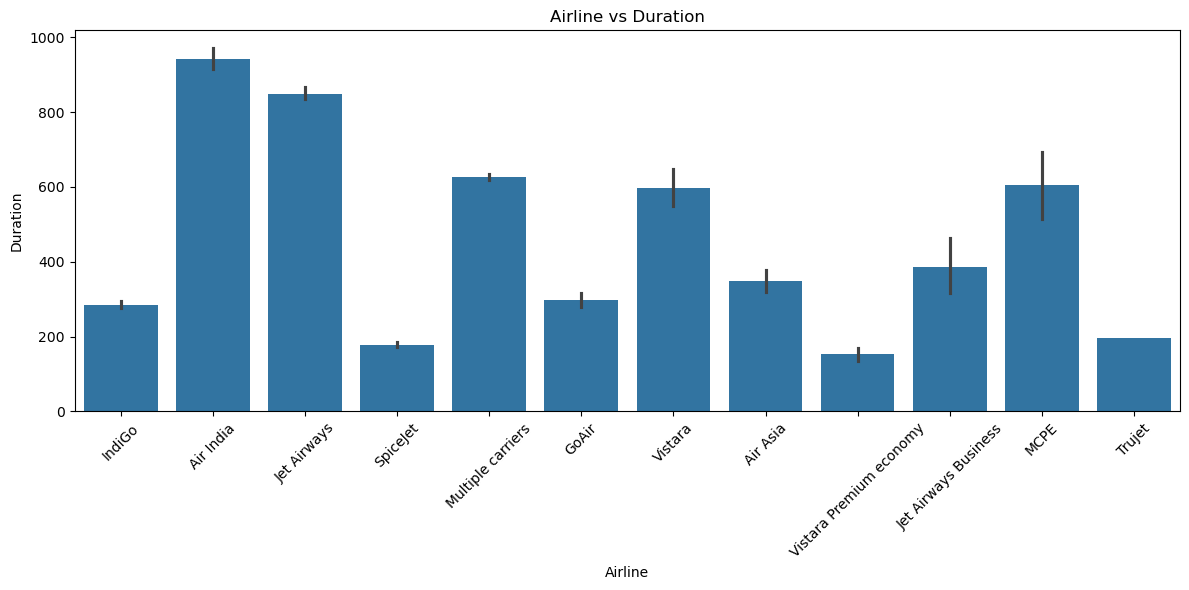

In [265]:
# Barplot visualization
for i in ['Price', 'Duration']:
    plt.figure(figsize=(12,6))
    sns.barplot(x='Airline', y=i, data=data)    # uses mean as default for y axis
    # sns.barplot(x='Airline', y=i, data=data, estimator=np.median)
    plt.xticks(rotation=45)
    plt.title(f'Airline vs {i}')
    plt.tight_layout()
    plt.show()

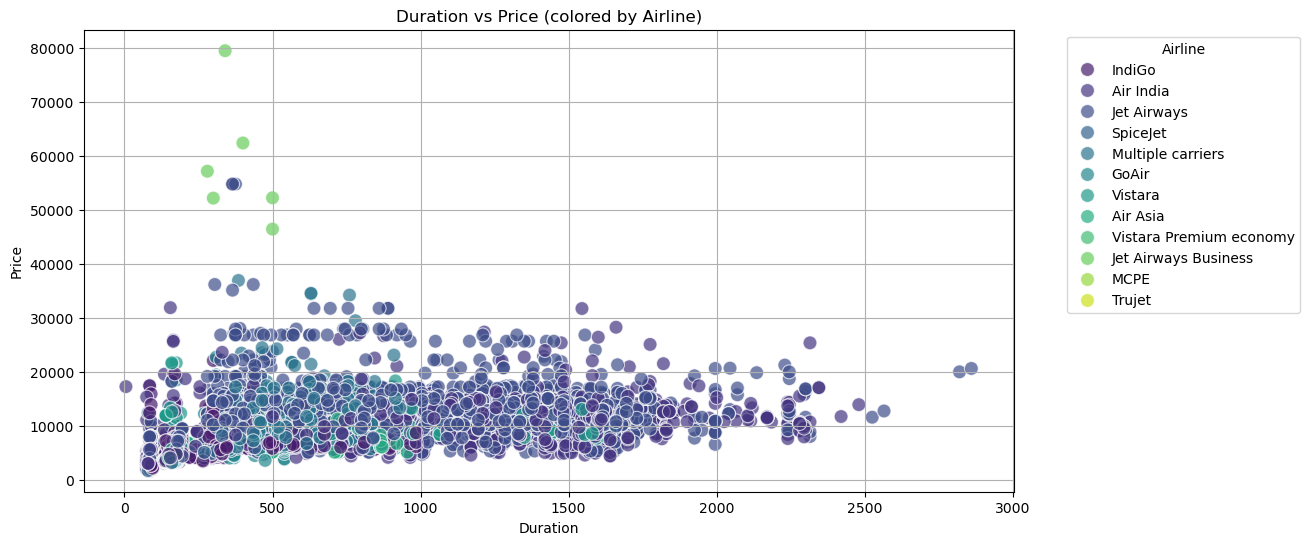

In [266]:
# Scatter Plot Visuatization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Duration', y='Price', hue='Airline', palette='viridis', s=100, alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration vs Price (colored by Airline)')
plt.grid(True)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

--- Price ---
Skewness: 1.8121500412235734
Kurtosis: 13.29514960886317
Standard Deviation: 4611.548810094335
Shapiro-Wilk Test: Statistic=0.896, p-value=0.000
Data is not Normal




d:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10682.
  res = hypotest_fun_out(*samples, **kwds)


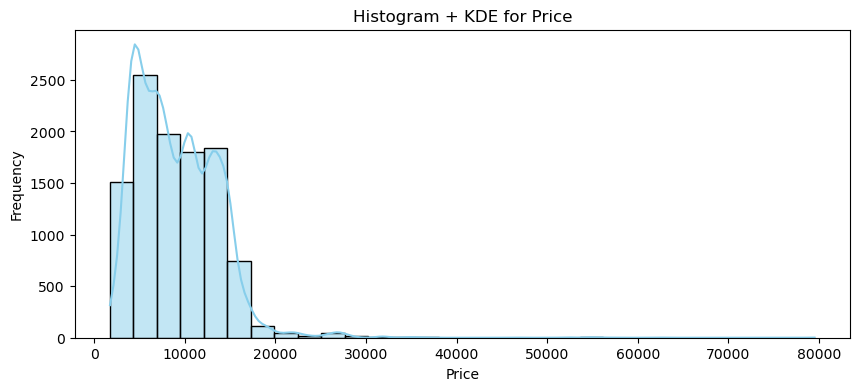

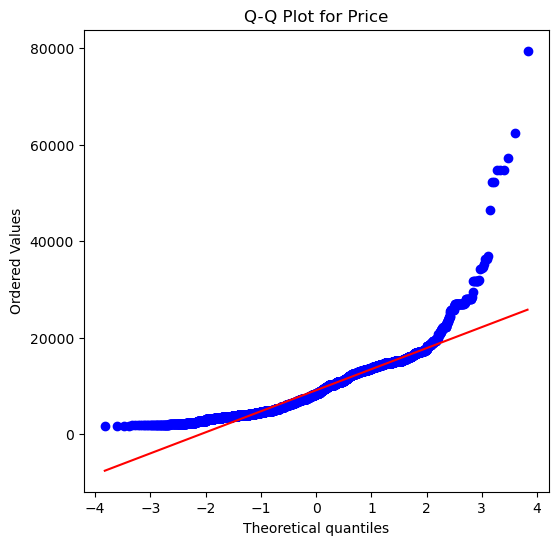

--- Duration ---
Skewness: 0.861290290795667
Kurtosis: -0.1668179688713134
Standard Deviation: 507.8301334913103
Shapiro-Wilk Test: Statistic=0.889, p-value=0.000
Data is not Normal




d:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10682.
  res = hypotest_fun_out(*samples, **kwds)


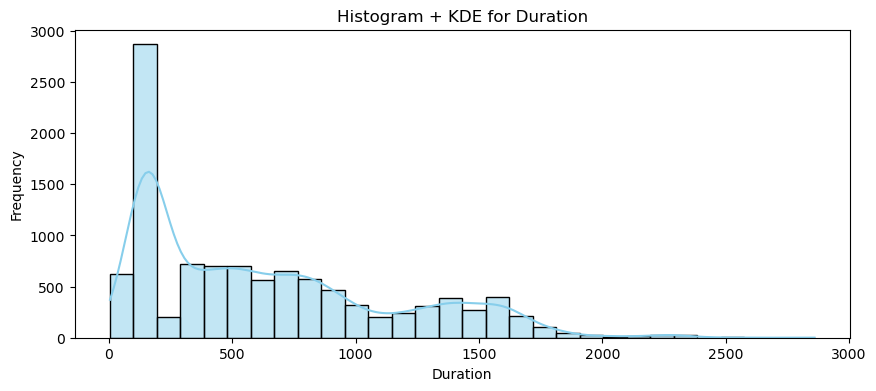

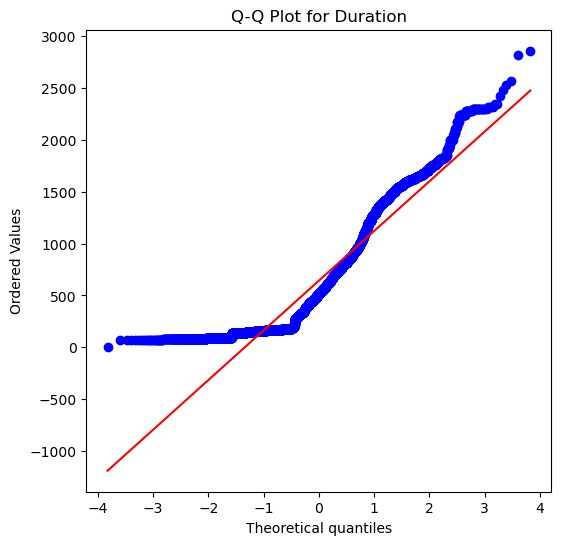

In [267]:
from scipy.stats import skew, kurtosis, shapiro, probplot

for col in ['Price', 'Duration']:
    print(f"--- {col} ---")
    print(f"Skewness: {skew(data[col])}")
    print(f"Kurtosis: {kurtosis(data[col])}")
    print(f"Standard Deviation: {data[col].std()}") 

    stat, p = shapiro(data[col])    # Shapiro-Wilk Normality Test
    print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print("Data is likely Noraml)")
    else:
        print("Data is not Normal")
    print("\n")

    # Histogram with KDE
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram + KDE for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(6,6))
    probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9896\1947649782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(data['Duration'], bins=bins, labels=labels), y=data['Price'], palette='viridis')


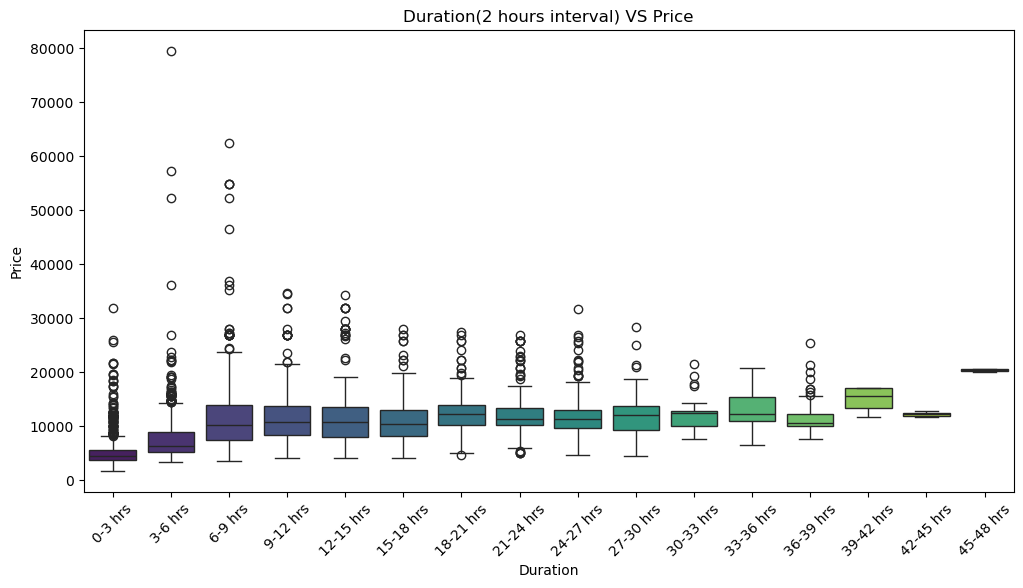

In [268]:
# Boxplot visualization of Duration VS Price for 3 hour interval

# Creates a list of bin edges to group flight durations
bins = list(range(0, int(data['Duration'].max()) + 179, 180))  # 0, 180, 360, ...
labels = [f'{i//60}-{(i+180)//60} hrs' for i in bins[:-1]]    # Create label

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(data['Duration'], bins=bins, labels=labels), y=data['Price'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Duration(2 hours interval) VS Price')
plt.show()

In [269]:
# Converts categorical columns into dummy/indicator variables
# Each unique category becomes a new binary column: 1 -> row belongs to category, 0 -> row does not belong

categorical = ['Airline', 'Source', 'Destination']
data = pd.get_dummies(data, columns=categorical, drop_first=True)
# data.head()

In [270]:
# Creates new dataFrame Route containing only the Route column from data
Route = data[['Route']].copy()
# Split the route into individual stops
for i in range(5):
    Route[f'Route_{i+1}'] = Route['Route'].str.split('→').str[i]
    
# Important placeholder, otherwise label encoder might crash
Route.fillna('None', inplace=True) 

In [271]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# converts categorical text labels into numeric labels
for i in range(5):
    Route[f'Route_{i+1}'] = le.fit_transform(Route[f'Route_{i+1}'])

Route.drop('Route', axis=1, inplace=True)

data = pd.concat([data, Route], axis=1)
data.drop('Route', axis=1, inplace=True)    # Concatenates encoded route columns back to data

price = data.pop('Price') 
data['Price'] = price

# data.head()

In [272]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

# data is now a NumPy array of scaled numeric features, where all features have same scale, mean=0 & std deviation=1


In [273]:
from sklearn.model_selection import train_test_split as tts

x = data[:, :-1]    # selects all columns except the last as feature
y = data[:, -1]     # selects the last column as the target variable (Price).

# Splits data into 10% for testing, 90% for training also ensures reproducibility
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.1, random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(9613, 33)
(1069, 33)
(9613,)
(1069,)


In [274]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [275]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE: ', mean_squared_error(y_true, y_pred)**0.5)
    print(f'R2_Value: ', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    error = abs(y_true-y_pred)
    mape = 100*np.mean(error/y_true)
    accuracy = 100-mape
    return accuracy

In [276]:
y_pred = model.predict(x_test)     # Predicted values of target variable (Price) for test set

metrics(y_test, y_pred)

accuracy(y_test, y_pred)

RMSE:  0.5321212024515283
R2_Value:  0.651391399789143


np.float64(72.5417146577007)

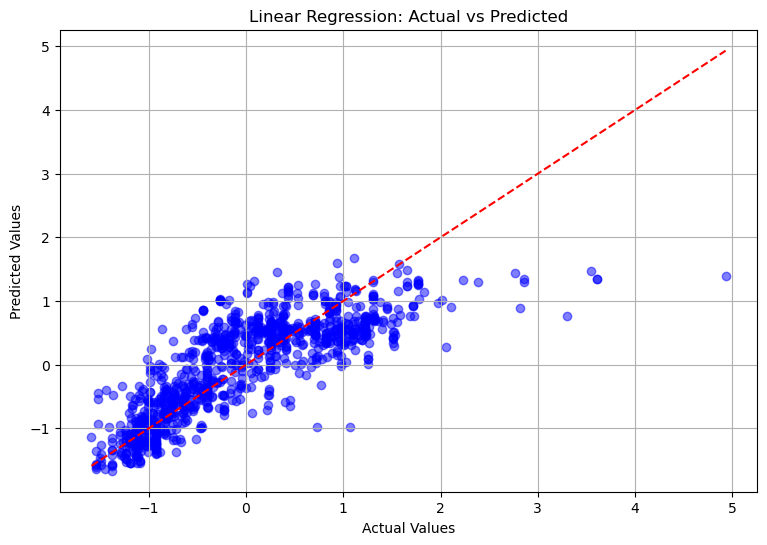

In [277]:
# Scatter plot visualization  of Actual VS Predicted values (for Linear Regression Model)
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [278]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=500, min_samples_split=3)
model_rf.fit(x_train, y_train)

pred_rf = model_rf.predict(x_test)

metrics(y_test, pred_rf)
accuracy(y_test, pred_rf)

RMSE:  0.3745430209709041
R2_Value:  0.8272888453829971


np.float64(96.84483487037755)

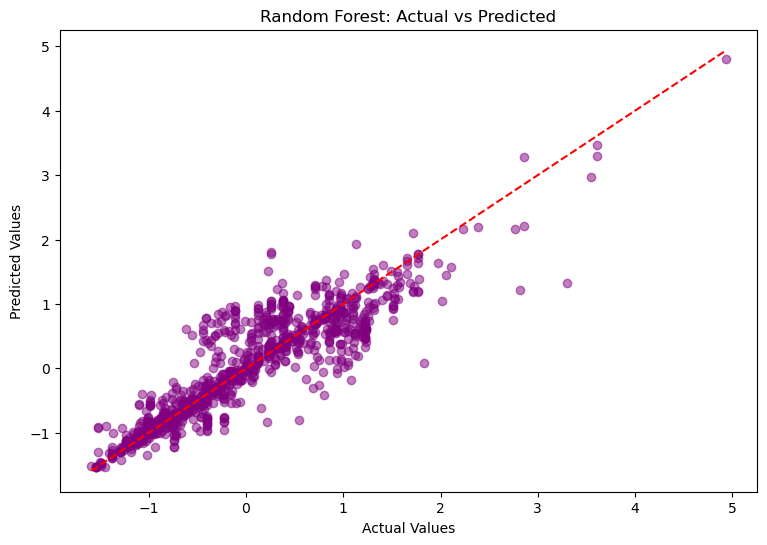

In [279]:
# Scatter plot visualization  of Actual VS Predicted values (for Random Forest Model)
plt.figure(figsize=(9,6))
plt.scatter(y_test, pred_rf, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()